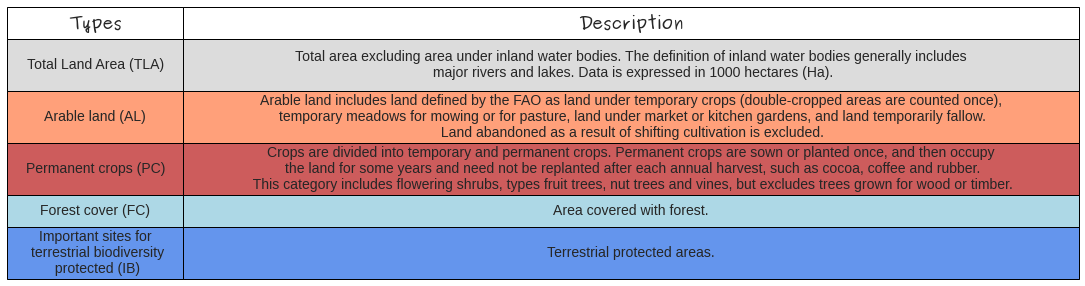

In [18]:
# I. Libraries
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import re

# II. Download the data
lands = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/ldown_c.csv')


#III. Define the function to do the table with the meaning of each kind of land.
def desc_table(df):
    ltype = df.type[df.type.str.contains('%|Land ')].unique()

    # Adecuate the strings of types of lands
    lterms=[]
    for n in ltype:
        s = (re.sub("[\(\[].*?[\)\]]", "", n)).strip()
        s = s.replace('Land area', 'Total Land Area')
        words = s.split()
        letters = [word[0].upper().strip() for word in words]
        o = "".join(letters)
        o = o.replace('ISFTBP','IB')
        n = (s+' ('+o+')')
        lterms.append(n)  

        #Spliting the sentence for adequate it to the column width
    lterms[4] = 'Important sites for\n terrestrial biodiversity\n protected (IB)'

    # Manual list with definitions of the type of lands
    t_0 = 'Total area excluding area under inland water bodies. The definition of inland water bodies generally includes\n major rivers and lakes. Data is expressed in 1000 hectares (Ha).'
    t_1 = 'Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once),\n temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow.\n Land abandoned as a result of shifting cultivation is excluded.'
    t_2 = 'Crops are divided into temporary and permanent crops. Permanent crops are sown or planted once, and then occupy\n the land for some years and need not be replanted after each annual harvest, such as cocoa, coffee and rubber.\n This category includes flowering shrubs, types fruit trees, nut trees and vines, but excludes trees grown for wood or timber.'
    t_3 = 'Area covered with forest.'
    t_4 = 'Terrestrial protected areas.'
    
    rows = [[lterms[0],t_0],[lterms[1],t_1],[lterms[2],t_2],[lterms[3],t_3],[lterms[4],t_4]]
    columns = ['Types', 'Description']
    
    color = [["gainsboro","gainsboro"],["lightsalmon","lightsalmon"],["indianred","indianred"],["lightblue","lightblue"],["cornflowerblue","cornflowerblue"]]

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    tab = plt.table(colLabels=columns,
                    cellText = rows, 
                    loc='center', 
                    cellColours=color,
                    colWidths = (0.23,1.17),
                    cellLoc = 'center',
                    rowLoc = 'center',
                    bbox = (-0.16,0,1.28,1), 
                   )
    # Changing the fontfamily
    for n in range(len(columns)):
        tab[0,n].set_text_props(fontfamily='Purisa', fontweight='heavy', size=16)
    for n in range(1,(len(rows)+1)):
        for s in range(0,2):
            tab[n,s].set_text_props(size=14)


    # Individual settings
    tab.auto_set_font_size(False)
    tab.set_in_layout(True)
    tab.scale(0.9,5.5) #set the width of the collumns

    # Cell height settings
    cellDict = tab.get_celld()
    for n in range(5):
        l = [0,4,5]
        if n in l:
            cellDict[(n,0)].set_height(0.15)
            cellDict[(n,1)].set_height(0.15)

    plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/desc_table.png')
    return plt.show()

desc_table(lands)